In [2]:
# reload files when they change
%load_ext autoreload
%autoreload 1

import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation

import torch
import torch.nn

import torchsummary


from tqdm.notebook import tqdm

%aimport constant
%aimport model
%aimport simulation
%aimport visual
%aimport loss

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/akarshkumar0101/miniconda3/envs/basketball-rl/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


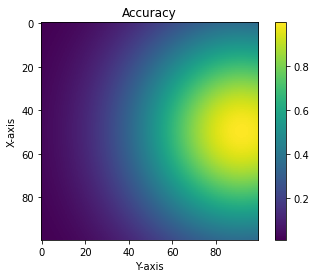

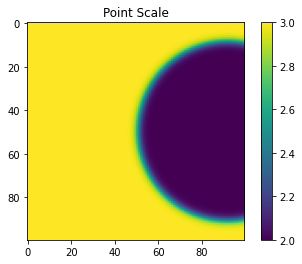

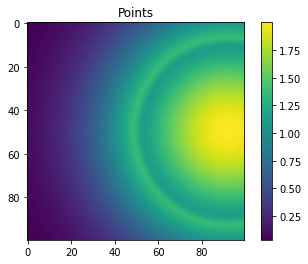

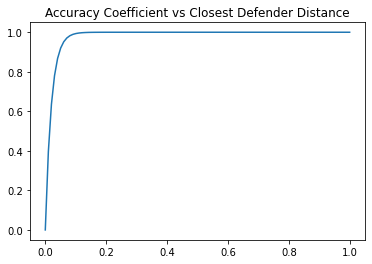

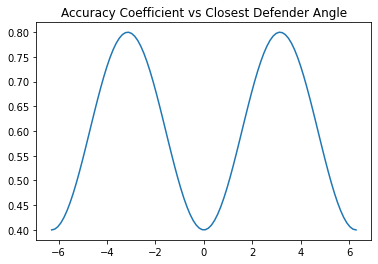

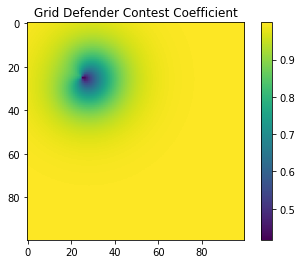

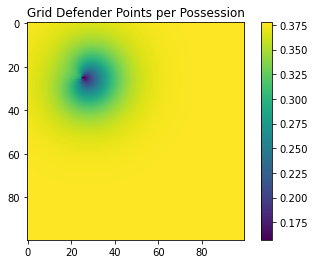

In [3]:
%matplotlib inline

resolution = 100
x, y = torch.meshgrid(torch.linspace(-1, 1, resolution), torch.linspace(-1,1, resolution))
pos_grid = torch.stack((x, y), dim=-1)


raw_acc = loss.raw_accuracy(pos_grid)
plt.imshow(raw_acc.numpy())
plt.xlabel('Y-axis')
plt.ylabel('X-axis')
plt.title('Accuracy')
plt.colorbar()
plt.show()


ps = loss.raw_points(pos_grid)
plt.imshow(ps.numpy())
plt.title('Point Scale')
plt.colorbar()
plt.show()


plt.imshow((ps*raw_acc).numpy())
plt.title('Points')
plt.colorbar()
plt.show()


d = torch.linspace(0, 1, 100)
cont = loss.raw_contest_distance(d)
plt.plot(d.numpy(), cont.numpy())
plt.title('Accuracy Coefficient vs Closest Defender Distance')
plt.show()


d = torch.linspace(-2*np.pi, 2*np.pi, 100)
cont = loss.raw_contest_angle(d)
plt.plot(d.numpy(), cont.numpy())
plt.title('Accuracy Coefficient vs Closest Defender Angle')
plt.show()

pos_op = torch.tensor([-0.5,-0.5])

cont = loss.contest(pos_op, pos_grid)
plt.imshow(cont.numpy())#, vmin=0, vmax=1)
plt.title('Grid Defender Contest Coefficient')
plt.colorbar()
plt.show()

ppp = loss.points_per_possession(pos_op, pos_grid[:, :, None, :])[:, :, 0]
plt.imshow(ppp)
plt.title('Grid Defender Points per Possession')
plt.colorbar()
plt.show()


torch.Size([1, 1, 2])
torch.Size([1, 5, 2])
torch.Size([1, 1])
Points per Possession:  1.1696051359176636


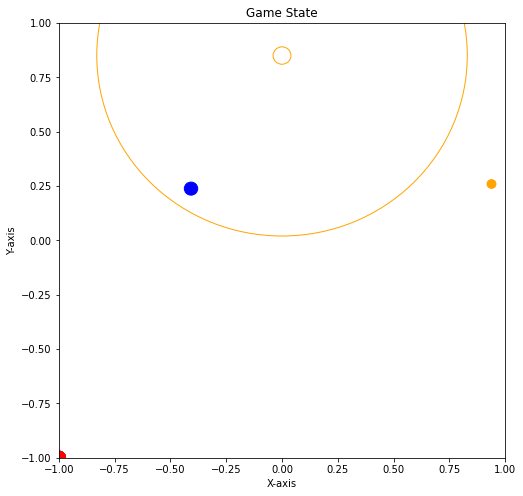

In [4]:
last_game_state = torch.rand(1, 11, 2)*2-1.
last_game_state[:, 1:5, :] = -1
last_game_state[:, 5:10, :] = -1 #last_game_state[:, :1, :]+torch.rand(1, 5, 2)-0.5
pos_op = last_game_state[:, :1, :]
pos_dp = last_game_state[:, constant.idxs_dp, :]

print(pos_op.shape)
print(pos_dp.shape)

ppp = loss.points_per_possession(pos_op, None)
print(ppp.shape)

print('Points per Possession: ', ppp.item())

visual.show_game_state(last_game_state[0])
plt.show()

In [4]:
last_game_state = torch.rand(1, 11, 2)*2.-1.
pos_op = last_game_state[:, :1, :]
pos_dp = last_game_state[:, constant.idxs_dp, :]
loss.points_per_possession(pos_op, pos_dp).shape

torch.Size([1, 1])